In [6]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
from tqdm import tqdm
import pandas as pd
directory = '../Labelled_Data'
 
posts = []
labels = []
for filename in tqdm(os.listdir(directory)):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        parser_df = pd.read_csv(f)
        for index, row in tqdm(parser_df.iterrows()):
            posts.append(row['title_text_combined'])
            labels.append(row['sentiment_labels'])

150it [00:00, 27012.39it/s]<?, ?it/s]
150it [00:00, 28940.87it/s]
150it [00:00, 28079.34it/s]
100%|██████████| 3/3 [00:00<00:00, 64.83it/s]


In [5]:
from sentiment_analysis import SentimentAnalyzer
sentiment_analyzer = SentimentAnalyzer()
pred_labels = sentiment_analyzer.batch_analysis(posts)


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
44it [00:28,  3.61it/s]

Sentiment Analysis Failed on post #43


61it [00:32,  5.33it/s]

Sentiment Analysis Failed on post #59


68it [00:35,  2.55it/s]

Sentiment Analysis Failed on post #68
Sentiment Analysis Failed on post #69


184it [01:14,  5.61it/s]

Sentiment Analysis Failed on post #184


209it [01:20,  6.79it/s]

Sentiment Analysis Failed on post #207


242it [01:34,  2.69it/s]

Sentiment Analysis Failed on post #240


320it [02:19,  1.31s/it]

Sentiment Analysis Failed on post #320


332it [02:23,  4.15it/s]

Sentiment Analysis Failed on post #330


450it [02:52,  2.61it/s]


In [28]:
print ("Charlie Accuracy:", sentiment_analyzer.calculate_accuracy(pred_labels[:150], labels[:150]))
print ("Daniel Accuracy:", sentiment_analyzer.calculate_accuracy(pred_labels[150:300], labels[150:300]))
print ("Dillan Accuract:", sentiment_analyzer.calculate_accuracy(pred_labels[300:], labels[300:]))

print ("Overall Accuracy (0.0 Confidence):", sentiment_analyzer.calculate_accuracy(pred_labels, labels))
print ("Overall Accuracy (.75 Confidence):", sentiment_analyzer.calculate_accuracy(pred_labels, labels, 0.75))

print ("Neutral Count (Pred):", len([i for i in pred_labels if i[0] == 'neutral']))
print ("Neutral Count (Labelled):", len([i for i in labels if i == 0]))

Charlie Accuracy: (0.5866666666666667, 150)
Daniel Accuracy: (0.76, 150)
Dillan Accuract: (0.7266666666666667, 150)
Overall Accuracy (0.0 Confidence): (0.6911111111111111, 450)
Overall Accuracy (.75 Confidence): (0.8394495412844036, 218)
Neutral Count (Pred): 0
Neutral Count (Labelled): 254


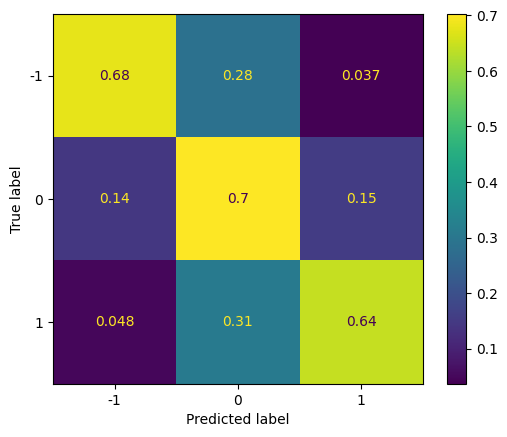

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions([x[0] for x in pred_labels], labels, normalize='true')

In [30]:
sentiment_analyzer.calculate_adjusted_accuracy(pred_labels, labels)

0.834313507411215

Cross-labelling Accuracy Analysis

In [7]:
import os
from tqdm import tqdm
import pandas as pd
directory = '../Cross_Labelled_Data/Comments'
 
comments = []
cross_labels = []
first_file = True
for filename in tqdm(os.listdir(directory)):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        parser_df = pd.read_csv(f)
        for index, row in tqdm(parser_df.iterrows()):
            if first_file:
                comments.append(row['body'])
                cross_labels.append([])
            cross_labels[index].append(row['sentiment_label'])
    first_file = False

433it [00:00, 52837.59it/s]<?, ?it/s]
433it [00:00, 55074.41it/s]
433it [00:00, 58601.97it/s]
100%|██████████| 3/3 [00:00<00:00, 81.05it/s]


In [10]:
from sentiment_analysis import SentimentAnalyzer
sentiment_analyzer = SentimentAnalyzer()
pred_labels = sentiment_analyzer.batch_analysis(comments)

/Users/danielstefanescu/miniforge3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
310it [00:49,  4

Sentiment Analysis Failed on post #310


433it [01:03,  6.78it/s]


In [18]:
print ("Cross Accuracy:", sentiment_analyzer.calculate_cross_accuracy(pred_labels, cross_labels))

Negative-Acc: 0.8616352201257862, Neutral-Acc: 0.8056872037914692, Positive-Acc: 0.873015873015873
Cross Accuracy: 0.836027713625866
